In [2]:
import pandas as pd
import os

# 현재 파이썬 코드의 파일 경로
current_path = os.getcwd()  # 현재 작업 디렉토리를 가져옵니다.

# CSV 파일 경로
file_path = os.path.join(current_path, 'top_error_data.csv')  # User uploaded fioytle to this path

data = pd.read_csv(file_path)
data

,age,BMI,admission_department,ward,surgeon_id,op_code,condition_source_value,surgery_room,surgery_duration,surgical_department_Cardiovascular Thoracic Surgery,...,previous_surgery_N,previous_surgery_Y,emergency_status_N,emergency_status_Y,gender_source_value_F,gender_source_value_M,Predicted Duration,Absolute Difference,Absolute Error,Error Percentage
0,18,29.196369,8,70,130,1528,224,11,1640,False,...,True,False,True,False,False,True,59.77,1580.23,1580.23,96.355488
1,5,29.594985,31,35,25,2222,4248,0,1518,False,...,False,True,True,False,False,True,131.09,1386.91,1386.91,91.364295
2,14,20.118884,26,29,37,533,3545,1,1400,False,...,True,False,True,False,False,True,55.13,1344.87,1344.87,96.062143
3,65,24.725450,8,24,53,2217,5404,6,1305,False,...,True,False,True,False,False,True,137.41,1167.59,1167.59,89.470498
4,56,20.805612,8,24,12,2932,2967,42,88,False,...,True,False,True,False,True,False,1240.32,1152.32,1152.32,1309.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,60,16.134450,17,1,22,2639,152,26,695,False,...,True,False,True,False,False,True,206.90,488.10,488.10,70.230216
1609,18,19.898590,36,40,148,1323,816,30,50,False,...,True,False,True,False,False,True,537.94,487.94,487.94,975.880000
1610,10,14.202407,29,67,95,1528,1577,8,537,False,...,True,False,False,True,True,False,49.09,487.91,487.91,90.858473
1611,64,28.448118,15,41,24,2199,1963,23,41,False,...,False,True,True,False,False,True,528.79,487.79,487.79,1189.731707


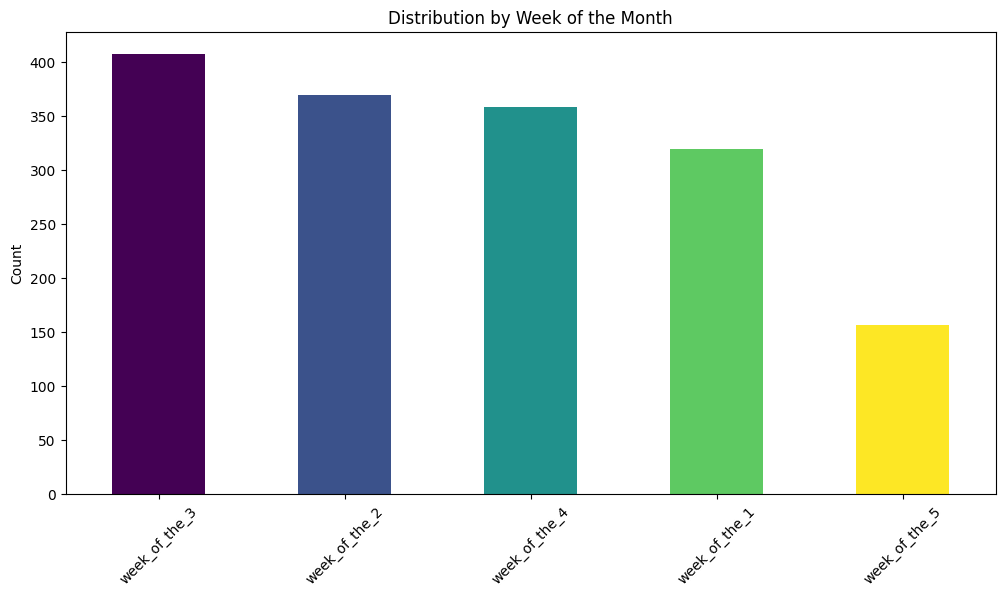

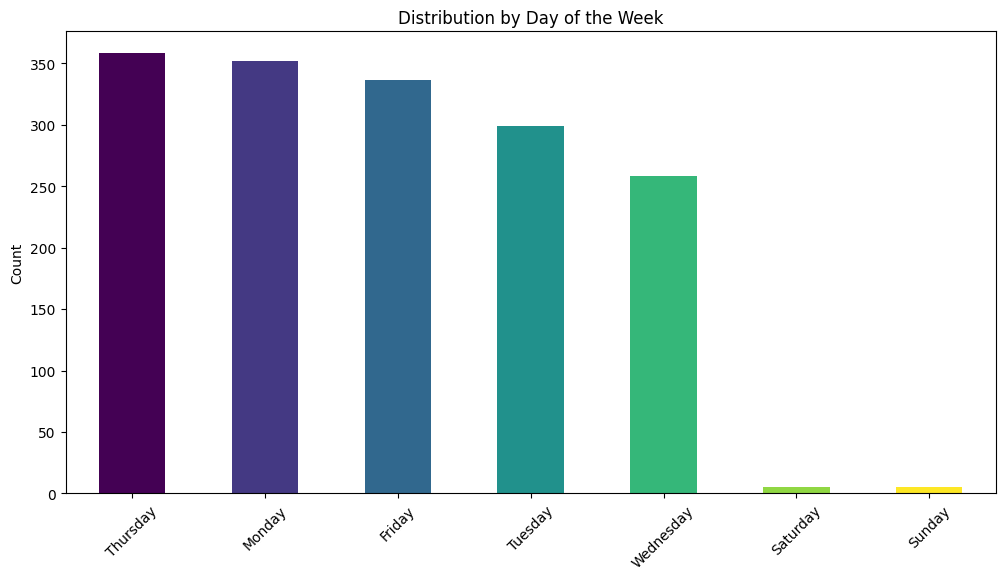

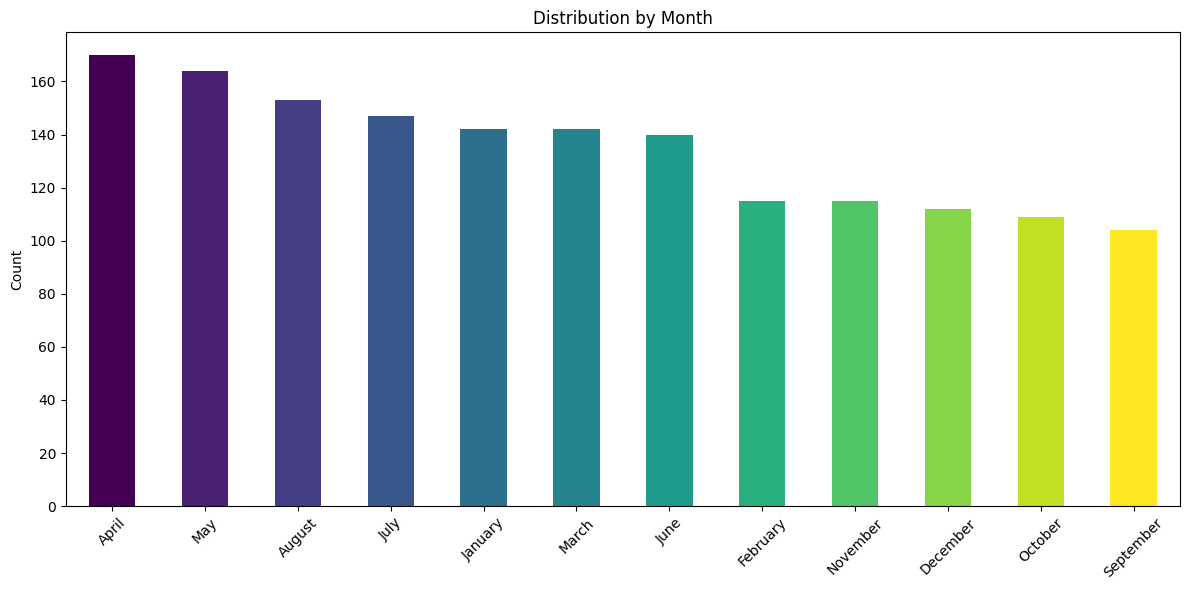

In [8]:
import matplotlib.pyplot as plt
import numpy as np 

# Function to create a sorted histogram for a given set of columns
def create_sorted_histogram(columns, title):
    plt.figure(figsize=(12, 6))
    # Summing up the True values for each column
    counts = data[columns].sum()
    # Removing prefix 'day_of_the_week_' for day of the week data and 'month_' for month data
    if 'day of the week' in title.lower():
        counts.index = [col.replace('day_of_the_week_', '') for col in counts.index]
    elif 'month' in title.lower():
        counts.index = [col.replace('month_', '') for col in counts.index]
    # Sorting the counts in descending order
    counts.sort_values(ascending=False).plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, len(counts))))
    plt.title(title)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
# It seems the variables were not defined in the current scope. Let's define them again and create the histograms.

# Columns for week of the month, day of the week, and month
week_of_the_month_cols = [col for col in data.columns if col.startswith('week_of_the_month')]
day_of_the_week_cols = [col for col in data.columns if col.startswith('day_of_the_week')]
month_cols = [col for col in data.columns if col.startswith('month')]

# Creating sorted histograms for each category
create_sorted_histogram(week_of_the_month_cols, 'Distribution by Week of the Month')
create_sorted_histogram(day_of_the_week_cols, 'Distribution by Day of the Week')
create_sorted_histogram(month_cols, 'Distribution by Month')

plt.tight_layout()
plt.show()


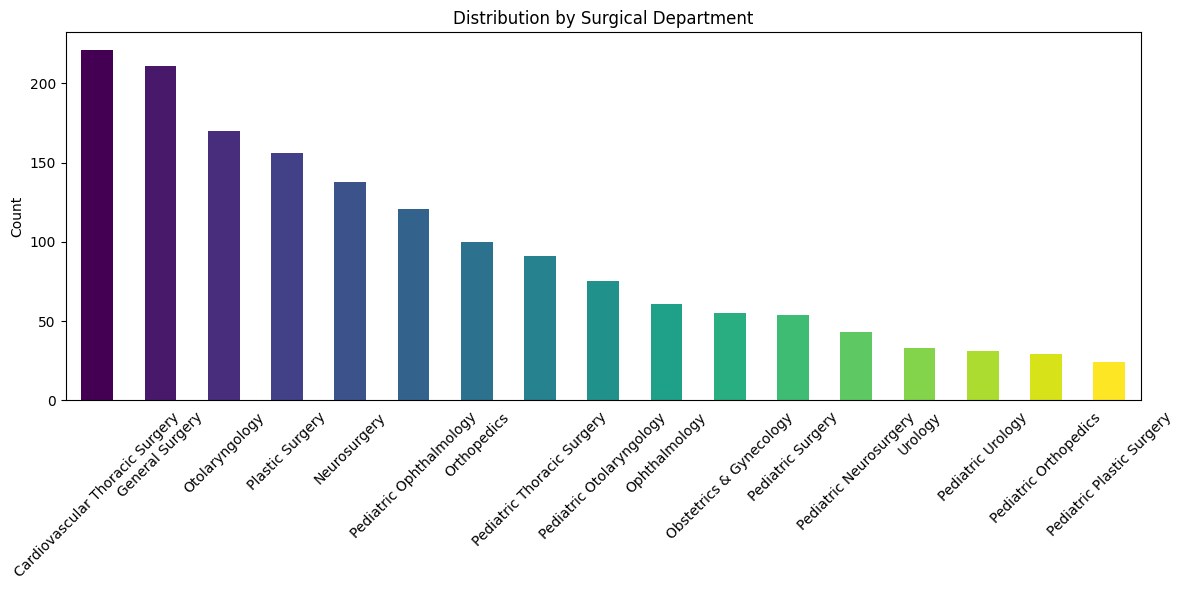

In [10]:
# Creating a histogram for the surgical departments with 'viridis' color palette and without the prefix 'surgical_department_'

# Filtering out columns related to surgical departments and renaming them
surgical_department_cols = [col.replace('surgical_department_', '') for col in data.filter(like='surgical_department').columns]

# Summing up the True values for each surgical department
department_counts = data.filter(like='surgical_department').sum()
department_counts.index = surgical_department_cols  # Renaming the index

# Creating the histogram
plt.figure(figsize=(12, 6))
department_counts.sort_values(ascending=False).plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, len(department_counts))))
plt.title('Distribution by Surgical Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='both', bottom=False, top=False)  # Removing x-axis lines

plt.tight_layout()
plt.show()
